# Logistic Regression on hearing_test dataset (without standardization)

## Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [6]:
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [7]:
df[df.columns[:-1]]

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [8]:
x = df[df.columns[:-1]]
x

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [9]:
y = df[df.columns[-1:]]
y

,test_result
0,1
1,1
2,0
3,0
4,1
...,...
4995,0
4996,1
4997,1
4998,1


## Standardization

In [10]:
# len(x)

In [11]:
# x['physical_score'].std()

In [12]:
# x['age'][3]

In [13]:
# for i in x.columns:
#     mean = x[i].mean()
#     std = x[i].std()
#     for j in range(len(x)):
#         x[i][j] = (x[i][j] - mean) / std

# x

## Adding 'x0' column = 1 in x for coding purpose 

In [14]:
x['x0'] = 1
x

,age,physical_score,x0
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,1
3,56.0,31.0,1
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,1
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [15]:
columns = list()
columns.append(x.columns[-1])

for i in x.columns[:-1]:
    columns.append(i)
columns

['x0', 'age', 'physical_score']

In [16]:
x[columns]

,x0,age,physical_score
0,1,33.0,40.7
1,1,50.0,37.2
2,1,52.0,24.7
3,1,56.0,31.0
4,1,35.0,42.9
...,...,...,...
4995,1,73.0,3.9
4996,1,57.0,33.9
4997,1,49.0,34.5
4998,1,38.0,46.4


In [17]:
x = x[columns]
x

,x0,age,physical_score
0,1,33.0,40.7
1,1,50.0,37.2
2,1,52.0,24.7
3,1,56.0,31.0
4,1,35.0,42.9
...,...,...,...
4995,1,73.0,3.9
4996,1,57.0,33.9
4997,1,49.0,34.5
4998,1,38.0,46.4


## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,random_state=101)

In [19]:
x_train

,x0,age,physical_score
141,1,32.0,43.0
4755,1,62.0,27.7
4886,1,40.0,49.1
2304,1,67.0,27.3
2727,1,53.0,35.3
...,...,...,...
4171,1,71.0,16.4
599,1,54.0,35.7
1361,1,65.0,21.2
1547,1,83.0,24.1


In [20]:
y_train

,test_result
141,1
4755,0
4886,1
2304,0
2727,1
...,...
4171,0
599,1
1361,0
1547,0


# Logistic Regression

## Initializing weights

In [21]:
n = len(x_train.columns)
n

3

In [22]:
w = np.zeros(n)
w

array([0., 0., 0.])

## Adjusting Weights

In [23]:
import math
math.exp(1)

2.718281828459045

In [24]:
len(w)

3

In [25]:
x_train

,x0,age,physical_score
141,1,32.0,43.0
4755,1,62.0,27.7
4886,1,40.0,49.1
2304,1,67.0,27.3
2727,1,53.0,35.3
...,...,...,...
4171,1,71.0,16.4
599,1,54.0,35.7
1361,1,65.0,21.2
1547,1,83.0,24.1


In [26]:
x_train.iloc[0,2]

43.0

In [27]:
y_train

,test_result
141,1
4755,0
4886,1
2304,0
2727,1
...,...
4171,0
599,1
1361,0
1547,0


In [28]:
y_train.iloc[1,0]

0

In [29]:
# math.log is what we interpret ln in math
math.log(10)

2.302585092994046

In [30]:
count_list = list()
loss_list = list()

for count in range(1,501):

    count_list.append(count)

    
    # calculating predicted value (pre threshold) using sigmoid function

    linear_sum = 0
    y_cap = list()

    for j in range(len(x_train)):
        for i in range(len(x_train.columns)):
            linear_sum = linear_sum + w[i] * x_train.iloc[j,i]

        predicted_value = 1 / (1 + math.exp(-1*linear_sum))
        y_cap.append(predicted_value)
        linear_sum = 0


    # calculating average loss

    loss_sum = 0

    for i in range(len(y_train)):
        loss = -1 * y_train.iloc[i,0] * math.log(y_cap[i]) - (1 - y_train.iloc[i,0]) * math.log(1 - y_cap[i])
        loss_sum = loss_sum + loss

    avg_loss = loss_sum / len(y_train)
    loss_list.append(avg_loss)


    # optimizing with gradient descent

    gradient_sum = 0
    dw_list = list()

    for i in range(len(x.columns)):
        for j in range(len(x_train)):
            gradient_sum = gradient_sum + (y_cap[j] - y_train.iloc[j,0]) * x_train.iloc[j,i]
        dw = gradient_sum / len(x_train)
        dw_list.append(dw)
        gradient_sum = 0


    # updating weights

    learning_rate = 0.01

    for i in range(len(dw_list)):
        w[i] = w[i] - learning_rate * dw_list[i]

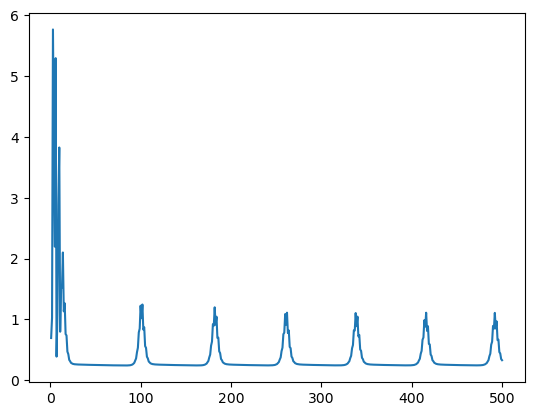

In [31]:
plt.plot(count_list,loss_list)

In [32]:
loss_list

[0.6931471805599777,
 1.0266163608509395,
 5.764601045220052,
 3.919655172338635,
 2.195613744079504,
 5.2936188391418275,
 0.3874936905648624,
 1.1210394911032993,
 2.8948283126051497,
 3.8249498203378067,
 0.7969331366476731,
 1.5015619323869107,
 1.5345456169024658,
 2.0989316315757325,
 1.131438665255071,
 1.2646737884036718,
 0.7580252271284528,
 0.7351604592711122,
 0.46967104176604313,
 0.4277627673953901,
 0.33429991453964203,
 0.3117309193979926,
 0.2849367412487152,
 0.2759347634773127,
 0.2680763523451735,
 0.26460441753106484,
 0.2619047225049824,
 0.26038648789213076,
 0.25919506532297365,
 0.2583585835379647,
 0.25765158918991227,
 0.2570642025915887,
 0.2565302327820548,
 0.2560422424210906,
 0.25557879397264016,
 0.2551362495771489,
 0.25470701965944575,
 0.25428947515409595,
 0.2538807004527808,
 0.2534799745588821,
 0.25308608769205787,
 0.25269871486603357,
 0.2523173143137738,
 0.2519417338469027,
 0.25157171039872683,
 0.2512071680720149,
 0.2508479667694298,
 0.25

In [33]:
y_cap

[0.9999956862469334,
 0.11285118858763998,
 0.9999982755360347,
 0.030501001284593925,
 0.9751683446729194,
 0.9962185862342933,
 0.9985278680965953,
 0.9917800924457995,
 0.7871081070756005,
 0.9982255614010485,
 0.9995560022783917,
 0.9988127561898743,
 0.004271126746254612,
 0.9979709895161796,
 0.5726841055560362,
 0.8644196942651593,
 0.008335410658367836,
 0.9999149739814275,
 0.40065558198194484,
 0.9997043453498422,
 0.022711007060155462,
 0.9998488518412113,
 0.47357246626964866,
 0.9988876676875307,
 0.9998919314659773,
 0.9934969234035844,
 0.06186871945466969,
 0.8512973850567516,
 0.9988249375209926,
 0.9999981562237565,
 0.0005807078330608105,
 0.9999993276432402,
 0.16598065365988768,
 0.9912683424463771,
 0.9999868542994939,
 0.9999051024683719,
 0.9922787199835766,
 0.9990310428336282,
 0.999721812001183,
 0.25087686445880786,
 0.9997019247588178,
 0.9959492733892618,
 1.88619628664374e-06,
 0.006048273710446946,
 0.06037003563417062,
 0.9998874336682032,
 0.0025577805

In [34]:
w

array([-0.01367506, -0.28318189,  0.44212808])

## Training Accuracy

just checking if the updated weights after 300 iterations are performing well on train dataset

In [35]:
# calculating predicted value (post threshold) using sigmoid function

linear_sum = 0
y_cap = list()

for j in range(len(x_train)):
    for i in range(len(x_train.columns)):
        linear_sum = linear_sum + w[i] * x_train.iloc[j,i]

    predicted_value = 1 / (1 + math.exp(-1*linear_sum))

    if predicted_value >= 0.5:
        final_result = 1
    else:
        final_result = 0

    y_cap.append(final_result)
    linear_sum = 0

y_cap

[1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [36]:
len(y_cap)

4500

In [37]:
# measuring accuracy

right = 0
wrong = 0

for i in range(len(y_train)):
    if y_cap[i] == y_train.iloc[i,0]:
        right = right + 1
    else:
        wrong = wrong + 1

accuracy = ( right * 100 ) / len(y_train)

print('Total :',len(y_train))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 4500
Right : 3991
Wrong : 509
Accuracy : 88.68888888888888


## Test Accuracy

In [38]:
# calculating predicted value (post threshold) using sigmoid function

linear_sum = 0
y_cap = list()

for j in range(len(x_test)):
    for i in range(len(x_test.columns)):
        linear_sum = linear_sum + w[i] * x_test.iloc[j,i]

    predicted_value = 1 / (1 + math.exp(-1*linear_sum))

    if predicted_value >= 0.5:
        final_result = 1
    else:
        final_result = 0

    y_cap.append(final_result)
    linear_sum = 0

y_cap

[1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,


In [39]:
len(y_cap)

500

In [40]:
# measuring accuracy

right = 0
wrong = 0

for i in range(len(y_test)):
    if y_cap[i] == y_test.iloc[i,0]:
        right = right + 1
    else:
        wrong = wrong + 1

accuracy = ( right * 100 ) / len(y_test)

print('Total :',len(y_test))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 500
Right : 446
Wrong : 54
Accuracy : 89.2
